In [70]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [71]:
df = pd.read_csv("origin_data.csv", index_col=0, parse_dates=[0])

In [72]:
df

,Office_Marla,Office_Maryann,Office_Myron,Office_Mick,Office_Moises,Office_Marcus,Office_Marc,Office_Mary,Office_Monty,Office_Marlon,...,Office_Megan,Office_Madisyn,Office_Morgan,Office_Marion,Office_Martin,Office_Muhammad,Office_Mikayla,Office_Mason,Office_Marcia,Office_Milton
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-06-02 00:00:00,10.50,4.654300,30.50,26.25,21.75,20.75,14.25,17.75,37.25,6.00,...,66.75,41.00,22.25,112.25,38.50,127.50,189.25,89.75,287.00,685.75
2014-06-02 01:00:00,8.25,4.003900,29.25,26.25,13.75,23.50,14.25,18.50,36.00,10.75,...,67.75,41.50,20.25,114.25,34.25,132.00,196.25,96.00,288.50,664.75
2014-06-02 02:00:00,9.00,4.483375,34.00,26.00,16.00,24.75,15.75,16.00,38.00,7.50,...,68.75,40.50,19.50,115.50,33.00,130.50,190.50,93.50,266.50,664.75
2014-06-02 03:00:00,9.00,4.418925,30.25,26.25,12.25,20.75,14.50,17.75,35.75,8.50,...,72.25,40.50,19.75,113.00,32.00,131.25,176.75,88.75,254.50,673.50
2014-06-02 04:00:00,9.25,3.978525,36.00,26.75,15.25,25.50,13.75,18.50,35.75,8.25,...,69.50,41.50,19.50,105.75,32.25,128.25,173.25,87.25,252.75,671.50
2014-06-02 05:00:00,10.25,4.435575,40.50,27.00,16.00,25.25,14.00,18.75,37.75,11.25,...,66.50,37.25,19.50,105.75,31.75,129.75,172.25,88.00,251.50,678.25
2014-06-02 06:00:00,9.00,4.362275,34.75,26.75,14.75,23.75,14.50,17.50,35.75,7.50,...,68.75,38.50,20.00,108.00,32.25,125.75,174.75,88.00,254.50,665.75
2014-06-02 07:00:00,12.00,4.125000,33.25,25.75,15.25,23.00,14.25,17.25,36.25,11.75,...,72.00,39.50,19.25,108.25,33.75,122.00,170.75,88.25,255.00,667.25
2014-06-02 08:00:00,10.50,4.503900,34.50,26.75,16.50,25.50,13.75,20.00,36.00,7.75,...,72.00,40.00,19.75,109.25,32.75,122.00,172.75,87.25,234.75,670.25


In [73]:
x = df['Office_Marla'].resample('D').mean()

In [75]:
x_train = x['2014-06-02':'2014-8-02']

In [76]:
x_train = x_train.fillna(x_train.mean())

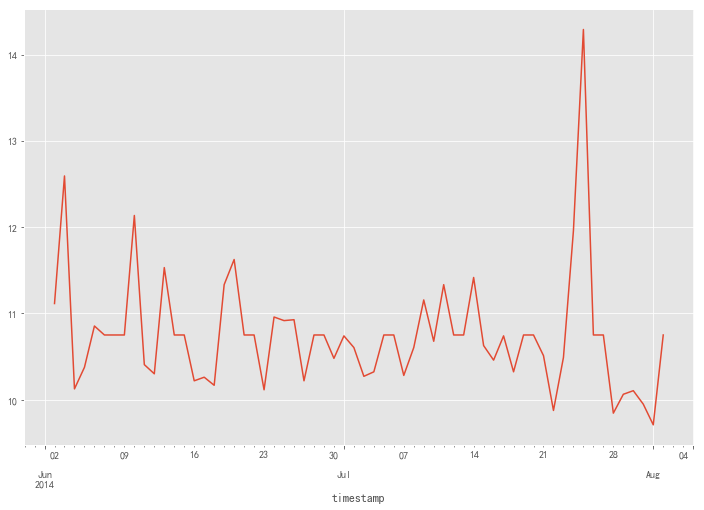

In [77]:
x_train.plot(figsize=(12,8))
sns.despine()

In [78]:
x_diff = x_train.diff().dropna()
x_diff

timestamp
2014-06-03    1.479167e+00
2014-06-04   -2.468750e+00
2014-06-05    2.500000e-01
2014-06-06    4.791667e-01
2014-06-07   -1.041667e-01
2014-06-08    0.000000e+00
2014-06-09   -1.776357e-15
2014-06-10    1.385417e+00
2014-06-11   -1.729167e+00
2014-06-12   -1.062500e-01
2014-06-13    1.231250e+00
2014-06-14   -7.812500e-01
2014-06-15    0.000000e+00
2014-06-16   -5.312500e-01
2014-06-17    4.166667e-02
2014-06-18   -9.375000e-02
2014-06-19    1.166667e+00
2014-06-20    2.916667e-01
2014-06-21   -8.750000e-01
2014-06-22    0.000000e+00
2014-06-23   -6.354167e-01
2014-06-24    8.437500e-01
2014-06-25   -4.166667e-02
2014-06-26    1.041667e-02
2014-06-27   -7.083333e-01
2014-06-28    5.312500e-01
2014-06-29    0.000000e+00
2014-06-30   -2.708333e-01
2014-07-01    2.604167e-01
2014-07-02   -1.354167e-01
                  ...     
2014-07-04    5.208333e-02
2014-07-05    4.270833e-01
2014-07-06    0.000000e+00
2014-07-07   -4.687500e-01
2014-07-08    3.229167e-01
2014-07-09    5.52

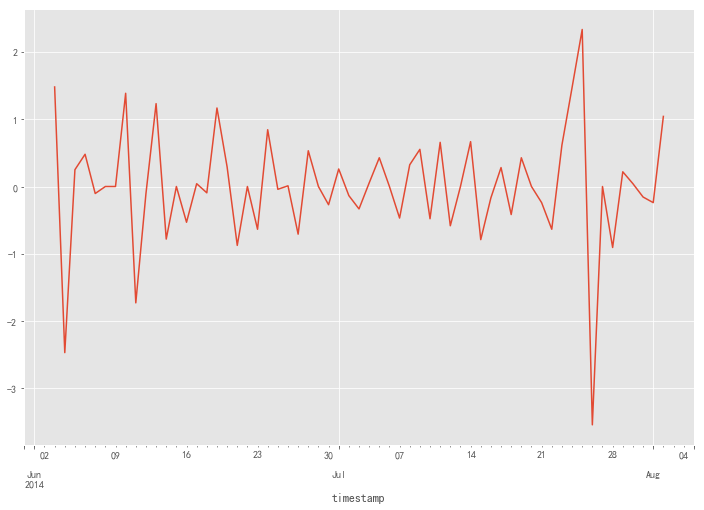

In [79]:
x_diff.plot(figsize=(12,8))
sns.despine()

F:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


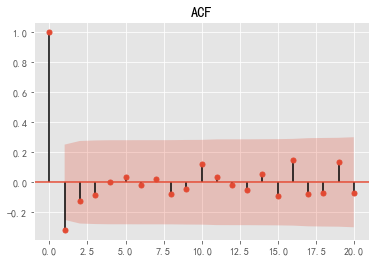

In [80]:
acf = plot_acf(x_diff, lags=20)
plt.title("ACF")
acf.show()

F:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


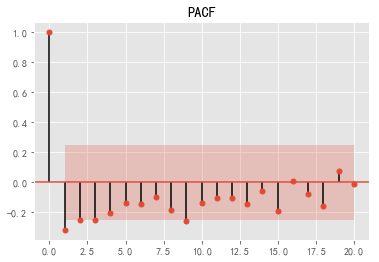

In [81]:
pacf = plot_pacf(x_diff, lags=20)
plt.title("PACF")
pacf.show()

In [82]:
model = ARIMA(x_train, order=(1, 1, 1),freq='D')

In [83]:
result = model.fit()

F:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
F:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [84]:
pred = result.predict('20140630', '20140930',dynamic=True, typ='levels')
print(pred)

2014-06-30    10.750823
2014-07-01    10.747335
2014-07-02    10.742873
2014-07-03    10.738191
2014-07-04    10.733459
2014-07-05    10.728716
2014-07-06    10.723971
2014-07-07    10.719224
2014-07-08    10.714478
2014-07-09    10.709732
2014-07-10    10.704985
2014-07-11    10.700239
2014-07-12    10.695492
2014-07-13    10.690746
2014-07-14    10.685999
2014-07-15    10.681253
2014-07-16    10.676507
2014-07-17    10.671760
2014-07-18    10.667014
2014-07-19    10.662267
2014-07-20    10.657521
2014-07-21    10.652774
2014-07-22    10.648028
2014-07-23    10.643282
2014-07-24    10.638535
2014-07-25    10.633789
2014-07-26    10.629042
2014-07-27    10.624296
2014-07-28    10.619550
2014-07-29    10.614803
                ...    
2014-09-01    10.453425
2014-09-02    10.448678
2014-09-03    10.443932
2014-09-04    10.439185
2014-09-05    10.434439
2014-09-06    10.429693
2014-09-07    10.424946
2014-09-08    10.420200
2014-09-09    10.415453
2014-09-10    10.410707
2014-09-11    10

F:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


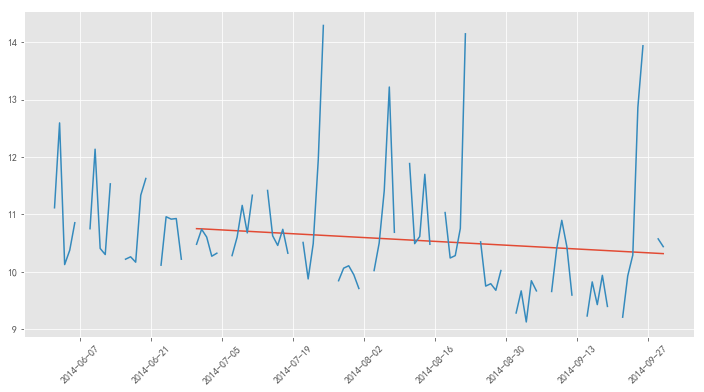

In [85]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(x)

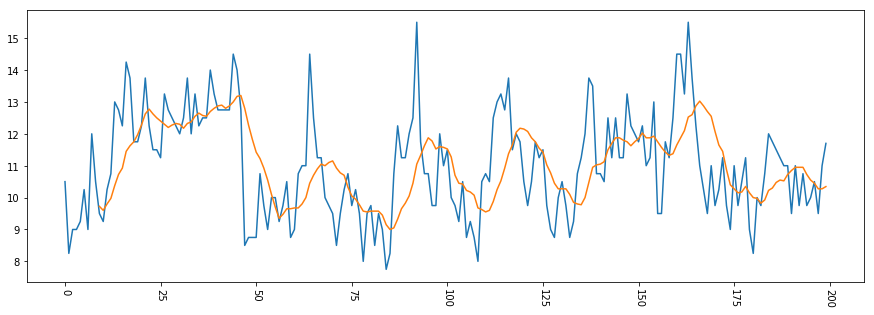

In [28]:
# x1 = df['timestamp'][0:200]
# y1 = df['Office_Marla'][0:200]
plt.figure(figsize=(15, 5))
plt.xticks(rotation=270)
plt.plot(df['Office_Marla'][0:200])
plt.plot(new_df.mean()['Office_Marla'][0:200])
# plt.plot(new_df.mean()[0:20])

In [16]:
new_df = df.rolling(window=10)

,timestamp,Office_Marla
0,2014-06-02 00:00:00+00:00,10.50
1,2014-06-02 01:00:00+00:00,8.25
2,2014-06-02 02:00:00+00:00,9.00
3,2014-06-02 03:00:00+00:00,9.00
4,2014-06-02 04:00:00+00:00,9.25
5,2014-06-02 05:00:00+00:00,10.25
6,2014-06-02 06:00:00+00:00,9.00
7,2014-06-02 07:00:00+00:00,12.00
8,2014-06-02 08:00:00+00:00,10.50
9,2014-06-02 09:00:00+00:00,9.50


In [20]:
new_df.mean()

,timestamp,Office_Marla
0,2014-06-02 00:00:00+00:00,NaN
1,2014-06-02 01:00:00+00:00,NaN
2,2014-06-02 02:00:00+00:00,NaN
3,2014-06-02 03:00:00+00:00,NaN
4,2014-06-02 04:00:00+00:00,NaN
5,2014-06-02 05:00:00+00:00,NaN
6,2014-06-02 06:00:00+00:00,NaN
7,2014-06-02 07:00:00+00:00,NaN
8,2014-06-02 08:00:00+00:00,NaN
9,2014-06-02 09:00:00+00:00,9.725


In [19]:
random_state = 40
X_train, X_test, y_train, y_test = train_test_split(df.drop('Office_Marla', 1), df['Office_Marla'],test_size = 0.2, random_state=random_state,shuffle =True) 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

ValueError: could not convert string to float: '2014-07-14 01:00:00+00:00'